# Convolutional Neural Network

In [1]:
# First of all we have to import all the important libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt

In [2]:
# Now we have to load the data
(x_train, y_train) , (x_test , y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 126s 1us/step


In [3]:
x_train , x_test = x_train/255.0 , x_test/255.0

In [4]:
# Build the CNN model
model = Sequential([
    Conv2D(32 , (3,3) , activation = 'relu' , input_shape=(32 , 32 , 3)),
    MaxPooling2D(3,3),
    Conv2D(64 , (3,3) , activation='relu'),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(64 , activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Now we compile the model
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'] 
)

In [6]:
# Now we fit the model
model.fit(x_train , y_train , validation_split=0.2 , verbose=True,epochs=10)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.2369 - loss: 2.0164 - val_accuracy: 0.4539 - val_loss: 1.5233
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 26ms/step - accuracy: 0.4352 - loss: 1.5328 - val_accuracy: 0.5017 - val_loss: 1.3865
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.4924 - loss: 1.3983 - val_accuracy: 0.5324 - val_loss: 1.3067
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.5307 - loss: 1.3104 - val_accuracy: 0.5774 - val_loss: 1.2095
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5585 - loss: 1.2483 - val_accuracy: 0.5876 - val_loss: 1.1722
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.5735 - loss: 1.1987 - val_accuracy: 0.5877 - val_loss: 1.1662
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.5972 - loss: 1.1495 - val_accuracy: 0.6231 - val_loss: 1.0844
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.6120 -

In [7]:
# loss and accuracy of the model
loss , acc = model.evaluate(x_test , y_test)
print(f'Accuracy is: {acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6371 - loss: 1.0286
Accuracy is: 0.64


In [8]:
# Predict the values of the model
preds = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [9]:
preds

array([[4.2050652e-02, 1.5651245e-02, 7.3293466e-03, ..., 5.6351148e-02,
        1.7836201e-01, 4.6556449e-01],
       [4.9833726e-02, 3.8199943e-02, 1.7223912e-05, ..., 8.3484620e-06,
        8.9436156e-01, 1.7534126e-02],
       [1.3240285e-01, 1.8539864e-01, 2.2900037e-03, ..., 3.6032312e-04,
        4.6776572e-01, 2.0449866e-01],
       ...,
       [5.2459905e-05, 1.4275613e-05, 8.7068938e-03, ..., 1.6779568e-02,
        6.3704509e-05, 1.7875148e-04],
       [1.1894035e-02, 8.6444223e-01, 8.7668095e-03, ..., 9.7839450e-03,
        1.4129095e-03, 6.7135066e-02],
       [1.9239965e-06, 5.8732223e-07, 3.7288474e-04, ..., 9.2954785e-01,
        6.0762479e-09, 8.9226023e-07]], dtype=float32)

In [12]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [10]:
import numpy as np

y_pred_probs = model.predict(x_test)  # shape (10000, 10)
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # shape (10000,)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


C:\Users\Home\AppData\Local\Temp\ipykernel_10360\1032737581.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true = class_names[int(y_test[i])]


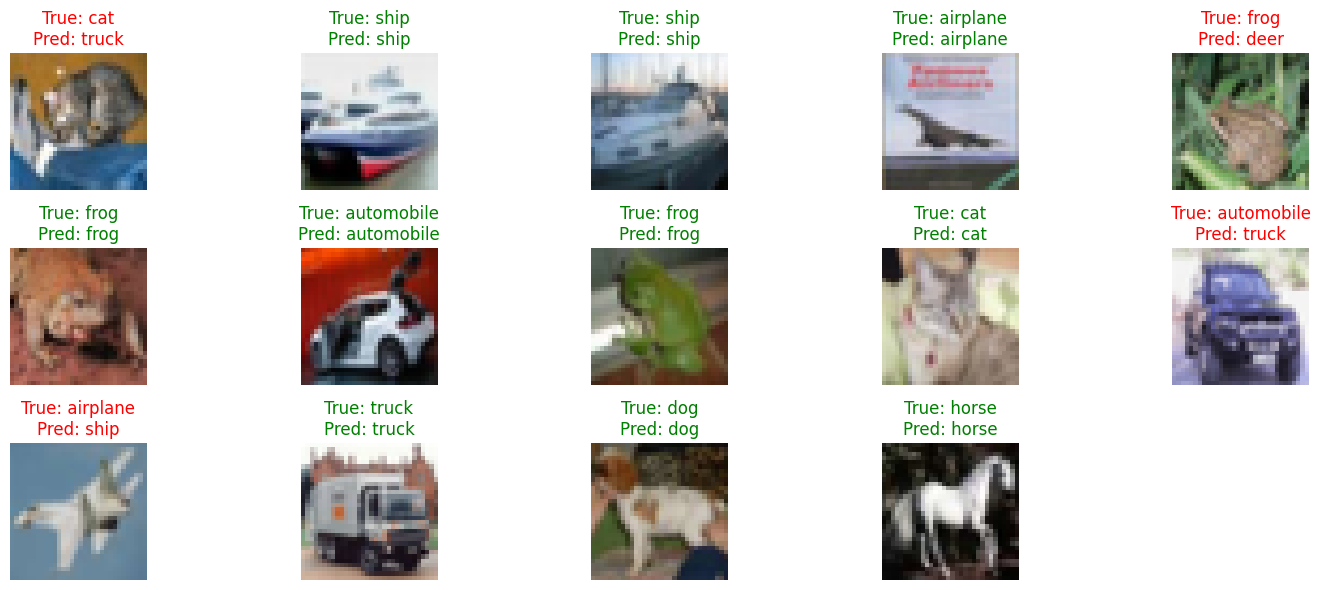

In [15]:
import matplotlib.pyplot as plt

# Show 15 predictions
plt.figure(figsize=(15, 6))
for i in range(14):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test[i])
    
    true = class_names[int(y_test[i])]
    pred = class_names[int(y_pred_classes[i])]

    color = 'green' if true == pred else 'red'
    plt.title(f"True: {true}\nPred: {pred}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()
